Go to http://cdn.gea.esac.esa.int/Gaia/tgas_source/fits/ to download all the *.fits files.

In [2]:
import astropy.io.fits
hdu = astropy.io.fits.open("data/TgasSource_000-000-000.fits")

In [3]:
hdu.info()


Filename: data/TgasSource_000-000-000.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   (37650,)     uint8   
1    TgasSource_000-000-000.fits  BinTableHDU    218   134865R x 59C   [J, 11A, K, K, K, D, D, D, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, E, J, J, J, J, J, J, E, D, D, L, E, E, E, J, I, L, E, E, E, E, E, E, E, E, J, D, D, D, 13A, D, D, D, D]   


In [3]:
import astropy.table
table = astropy.table.Table(hdu[1].data)

In [5]:
table.colnames

['hip',
 'tycho2_id',
 'solution_id',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_good_obs_ac',
 'astrometric_n_bad_obs_al',
 'astrometric_n_bad_obs_ac',
 'astrometric_delta_q',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_primary_flag',
 'astrometric_relegation_factor',
 'astrometric_weight_al',
 'astrometric_weight_ac',
 'astrometric_priors_used',
 'matched_observations',
 'duplicated_source',
 'scan_direction_strength_k1',
 'scan_direction_strength_k2',
 'scan_direction_strength_k3',
 'scan_direction_strength_k4',
 'scan_direction_mean_k1',


In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

<IPython.core.display.Javascript object>


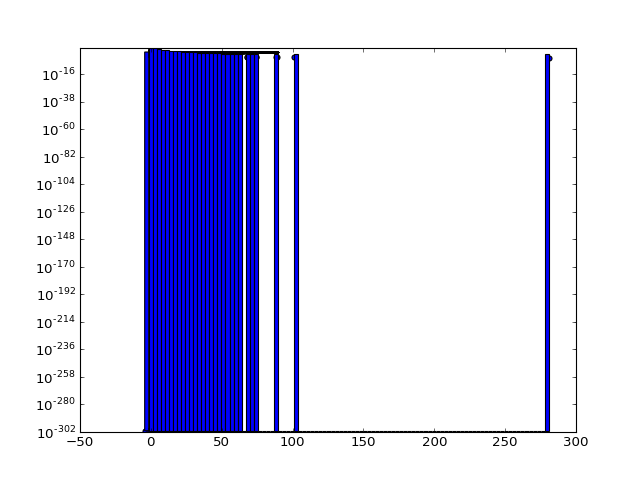

In [7]:
plt.scatter(table['ra'], table['dec'], s=0.1, alpha=0.1)

In [8]:
plt.hist(table['parallax'], bins=100)
plt.yscale('log')

In [9]:
plt.scatter(table['parallax'], table['parallax_error']/table['parallax'])
plt.show()

In [10]:
fraction = table['parallax_error']/table['parallax']
ok = fraction < 0.2
print sum(ok)

70108


In [11]:
table['ra'][ok] # pull out those elements where ok is True

45.0343303544
45.1650067709
45.086154838
45.0665415576
45.1360382232
45.1413781152
45.1529589487
45.1127787196
45.0102695067
44.9746592961
45.5014469463


In [13]:
print (table['parallax'])

   parallax   
--------------
 6.35295075173
 3.90032893507
 3.15531322004
 2.29236683516
 1.58207696027
 8.66308044444
 5.69820458536
 2.09081229243
 6.20249216692
 1.67767347665
           ...
 1.93028439128
0.487712373889
 4.78574011644
0.671395519642
0.203858608209
0.537168911399
0.314418479516
 1.94816019271
 1.88579646256
 3.18665158133
 2.31673565154
Length = 134865 rows


In [7]:
astropy.table??